In [191]:
import pandas as pd
df = pd.read_csv("../annotation-tool/backend/ethnic_dataset_exp0_5342.csv")
df

,Unnamed: 0,content
0,0,আন্তর্জাতিক আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্...
1,1,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...
2,2,"সিনিয়র শিক্ষক, প্রগতি মডেল স্কুল অ্যান্ড কলেজ,..."
3,3,"আফরোজা বেগমসিনিয়র শিক্ষক, উত্তরা হাইস্কুল অ্যা..."
4,4,"নারায়ণগঞ্জের রূপগঞ্জ ও ফতুল্লা, গাজীপুরের কালি..."
...,...,...
5337,5337,খাগড়াছড়ির দীঘিনালায় জেএসএস (এমএন লারমা) সমর্থি...
5338,5338,শান্তি-সম্প্রীতি স্থাপনে দুই দশক আগে পার্বত্য ...
5339,5339,জনপ্রিয় ম্যাগাজিন অনুষ্ঠান ‘ইত্যাদি’ আজ শুক্রব...
5340,5340,সরকারি বেতন স্কেলের নবম থেকে ১৩তম গ্রেড পর্যন্...


In [192]:
updated_articles = []
for article in df["content"].values.tolist():
    if "রাখাইন" not in article:
        updated_articles.append(article)
len(updated_articles)

4893

## Temp Ends

In [173]:
EXPERIMENT_IDENTIFIER = "exp2"

In [70]:
!pip install -q -U google-generativeai
!pip install python-dotenv
!pip install pandas
!pip install joblib
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 122.5 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 24.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.8 kB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 90.7 kB/s eta 0:00:0000:0100:02m


In [174]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

True

In [175]:
!ls ../annotation-tool/backend

cleaned_10k_articles.csv		      grouped_docs_110724.joblib
docs_per_topic_28July.joblib		      openai-request.py
envAnnotation				      __pycache__
ethnic_dataset_exp0_5342_annotated_1-151.csv  result_annotations.csv
ethnic_dataset_exp0_5342_annotated.csv	      server.py
ethnic_dataset_exp0_5342.csv		      shuffled_50_annotation.zip
first_100_annotation.zip


### Library Codes

In [176]:
import os
import google.generativeai as genai
import json

def get_response_from_gemini(articles):
    genai.configure(api_key=os.environ["GEMINI_API_KEY"])

    # Create the model
    generation_config = {
      "temperature": 1,
      "top_p": 0.95,
      "top_k": 64,
      "max_output_tokens": 8192,
      "response_mime_type": "text/plain",
    }
    
    model = genai.GenerativeModel(
      model_name="gemini-1.5-flash",
      generation_config=generation_config,
      # safety_settings = Adjust safety settings
      # See https://ai.google.dev/gemini-api/docs/safety-settings
    )
    responses = []
    for index,article in enumerate(articles):
        response = model.generate_content([
          "You are a Bangla news article analyzer. I will give you a news article and you will say which genre(s) it belongs to. The genres are: Crime, Politics, Natual Disaster, Sciene & Environment, Government actions, Business & Economy, International Affairs, Education, Health, Sports, Protests, Culture, Entertainment, Lifestyle, Discourse. Additionally, you will also say if the description is Straight, Investigation, Commentary. Return me just a json of {\"genre\": GENRE, \"description_style\": STYLE}.",
          "News article:  আন্তর্জাতিক\n আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্ন স্থানে সভা-সমাবেশ ও রযালি অনুষ্ঠিত \nহয়েছে। উপজাতিদের\n বিভিন্ন সংগঠন এসব কর্মসূচির আয়োজন করে। যুগান্তর ব্যুরো ও প্রতিনিধিদের \nপাঠানো খবর-সিলেট ব্যুরো : রযালিতে সিলেট প্রেস ক্লাবের সভাপতি ইকরামুল \nকবির, ইমজার সভাপতি আল আজাদসহ সিলেটের সাংস্কৃতিক অঙ্গনের ব্যক্তি ও উপজাতি\n জনগোষ্ঠীর লোকজন ছাড়াও বিভিন্ন শ্রেণী-পেশার মানুষ অংশগ্রহণ করেন। এছাড়া \nদিবসটি উপলক্ষে শাহজালাল বিজ্ঞান ও প্রযুক্তি বিশ্ববিদ্যালয়ে আলোচনা সভা \nঅনুষ্ঠিত হয়েছে। ‘অ্যাসোসিয়েশন অব ইন্ডিজেনাস স্টুডেন্টস, সাস্ট’ ও \nসমাজকর্ম বিভাগ আলাদা আলাদাভাবে দিবসটি উপলক্ষে রযালি, সেমিনার ও আলোচনা \nসভার আয়োজন করে।ময়মনসিংহ ব্যুরো : অনুষ্ঠানের উদ্বোধন করেন জেলা পরিষদের \nচেয়ারম্যান অধ্যাপক ইউসুফ খান পাঠান। বক্তব্য রাখেন হিন্দু বৌদ্ধ খ্রিস্টান\n ঐক্য পরিষদের সভাপতি বিকাশ রায়, সিপিবি সভাপতি এমদাদুল হক মিল্লাত, মহিলা \nপরিষদের সভানেত্রী ফেরদৌস আরা মাহমুদা হেলেন, হিল্লুুল নকরেক, অরণ্য-ই \nচিরান, স্বর্ণকান্ত হাজং সাংবাদিক \nশরীফুজ্জামান টিটু প্রমুখ।শেরপুর : বাগাছাস সভাপতি রুনু নকরেটের সভাপতিত্বে\n অনুষ্ঠিত আলোচনা সভায় প্রধান অতিথি ছিলেন ঝিনাইগাতী উপজেলা চেয়ারম্যান \nআমিনুল ইসলাম বাদশা। বক্তব্য রাখেন, উপজেলা ভাইস চেয়ারম্যান আমিরুর ইসলাম \nমক্কু, বাগাছাসের কেন্দ্রীয় কমিটি সাবেক সভাপতি পবিত্র ম্র্রং, সাংবাদিক \nরফিক মজিদ, উপজাতি ছাত্রনেতা নিরু চিরান, \nরবি কোচ, সত্যজিৎ মৃ প্রমুখ।কলমাকান্দা (নেত্রকোনা) : হাটগোবিন্দপুর \nবিদ্যালয় মাঠে অনুষ্ঠানে বক্তব্য রাখেন উপজেলা ভাইস চেয়ারম্যান কলি আক্তার,\n পপি সিডস প্রোগ্রাম ম্যানেজার শরিফুল ইসলাম, টিউলিপ ম্রং, অশোক চিসিম, \nইউলসন কুবি প্রমুখ।দুর্গাপুর (নেত্রকোনা) : রযালি শেষে টিডব্লিউএ’র সভাপতি \nবঙ্কিম মানখিনের সভাপতিত্বে সভায় উপজাতি \nনেতা সায়মন তজুর সঞ্চালনায় প্রধান অতিথি ছিলেন সহকারী কমিশনার ভূমি মো. \nইয়ামিন হোসেন। বক্তব্য রাখেন ভারপ্রাপ্ত পুলিশ কর্মকর্তা মিজানুর রহমান, \nআদিবাসী নারীনেত্রী স্বপ্না হাজং, লুদিয়া রুমা সাংমা, এনজিও সমন্বয় পরিষদের\n সভাপতি মি. পঙ্কজ মারাক, স্বপন হাজং প্রমুখ।শ্রীমঙ্গল : বুধবার রযালি ও \nপথসভার উদ্বোধন করেন বৃহত্তম আদিবাসী ফোরামের সহ-সভাপতি জিডিসন প্রধান \nসুচিয়াং। উপস্থিত ছিলেন সংগঠনের মহাসচিব ফিলা পত্মি, চা জনগোষ্ঠী আদিবাসী\n ফ্রন্টের সভাপতি পরিমল সিং বাড়াইক, খাসি সোসিয়াল কাউন্সিলের সাজু মারছিয়াং\n প্রমুখ।ধোবাউড়া (ময়মনসিংহ) : আলোচনা সভায় বাগাছাস ধোবাউড়া শাখার সভাপতি \nসাগর ডিব্রার সভাপতিত্বে বক্তব্য রাখেন ট্রাইবাল ওয়েলফেয়ার অ্যাসোসিয়েশনের \nচেয়ারম্যান এডুয়ার্ট নাফাক, ভাইস চেয়ারম্যান হেরোথ চিরান, বাগাছাস \nকেন্দ্রীয় প্রচার সম্পাদক শক্তি চিরান, ধোবাউড়া শাখার সম্পাদক ন্যান্সি \nডিব্রা প্রমুখ।কলাপাড়া : সভায় সভাপতিত্ব করেন রাখাইন মংচো।\n প্রধান অতিথির বক্তব্য রাখেন উপজেলা চেয়ারম্যান আবদুল মোতালেব তালুকদার। \nবিশেষ অতিথি ছিলেন ইউএনও এবিএম সাদিকুর রহমান, কৃষি কর্মকর্তা মসিউর রহমান,\n অধ্যক্ষ ড. শহীদুল ইসলাম বিশ্বাস, মাহমুদুর রহমান, সাংবাদিক জসিম পারভেজ, \nরাখাইন চোথেন মং ও অংনয় প্রমুখ।হালুয়াঘাট (ময়মনসিংহ) : গারো\n স্টুডন্ট ইউনিয়ন (গাসু) এবং সেন্টএন্ড্রুজ বয়েজ ও সেন্ট মেরিস গার্লস \nসিএমডি হোস্টেলের নেতারা অংশগ্রহণে একটি রযালি হালুয়াঘাট বাজার প্রদক্ষিণ \nকরে।",
          "Genre: {'genre': ['Culture'],\n'description_style': 'Commentary'}",
          "News article:  গাইবান্ধার গোবিন্দগঞ্জের রংপুর চিনিকলের \nসাহেবগঞ্জ ইক্ষু খামারে দেয়া কাঁটাতারের বেড়ার পিলার ভাংচুর করেছে \nদুর্বৃত্তরা।সোমবার রাতে খামার সংলগ্ন জয়পুর পাড়ার দক্ষিণ অংশে দেয়া ২৬টি \nপিলার ভাংচুর করা হয়।খামারের জমি সাঁওতালদের কাছ থেকে দখলমুক্ত করার পর মিল কর্তৃপক্ষ এই কাঁটাতারের বেড়া দেয়। এরপর সোমবার রাতে সাঁওতাল\n পল্লী সংলগ্ন খামারের বেড়ার পিলার ভাংচুর করে দুর্বৃত্তরা।রংপুর সুগার \nমিলের ব্যবস্থাপনা পরিচালক আব্দুল আউয়াল জানান, দুস্কৃতকারীরা রাতের আধারে \nখামারের পশ্চিম অংশে সাঁওতাল পল্লী জয়পুর \nপাড়া সংলগ্ন ২৬টি পিলার ভাংচুর করে। এ ঘটনায় ১৩ জনের নাম উল্লেখ করে \nখামারের উপ-ব্যবস্থাপক মো. হুমায়ন কবির মঙ্গলবার রাতে গোবিন্দগঞ্জ থানায় \nএকটি জিডি করেন।গোবিন্দগঞ্জ থানার ওসি সুব্রত কুমার সরকার বিষয়টি নিশ্চিত \nকরে বলেন, ঘটনার বিষয়টি খতিয়ে দেখা হচ্ছে।গত ৬ নভেম্বর আদিবাসী সাঁওতালদের সঙ্গে আইনশৃংখলা বাহিনী চিনিকলের শ্রমিক-কর্মচারীদের সংঘর্ষের পর ইক্ষু খামার থেকে সাঁওতাল বসতি উচ্ছেদ, লুটপাট, গুলিতে ৩ সাঁওতাল নিহত হওয়ার ঘটনায় সেখানে এখনও অস্থিরতা রয়েছে।",
          "Genre: {'genre': ['Discourse', 'Crime'],\n'description_style': 'Investigative'}",
          f"News article:  {article}",
          "Genre: ",
        ])
        print(f"{index}){response.text}")
        responses.append(response)
    return responses

def post_process_gemini_1_5_flash_response_to_json(text):
    json_string = text.replace("```", "").replace("json","").replace("\n","").replace("'", '"')
    json_output = json.loads(json_string)
    return json_output

### Ethnic Artciles

In [177]:
import pandas as pd
ethnic_df = pd.read_csv("../annotation-tool/backend/ethnic_dataset_exp0_5342.csv")
ethnic_df.head()

,Unnamed: 0,content
0,0,আন্তর্জাতিক আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্...
1,1,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...
2,2,"সিনিয়র শিক্ষক, প্রগতি মডেল স্কুল অ্যান্ড কলেজ,..."
3,3,"আফরোজা বেগমসিনিয়র শিক্ষক, উত্তরা হাইস্কুল অ্যা..."
4,4,"নারায়ণগঞ্জের রূপগঞ্জ ও ফতুল্লা, গাজীপুরের কালি..."


In [190]:
N = 1000

In [179]:
responses = get_response_from_gemini(ethnic_df["content"].values.tolist()[:N])

0)```json
{"genre": ["Culture"], "description_style": "Straight"}
```
1)```json
{"genre": ["Crime", "Politics", "Protests", "Discourse"], "description_style": "Investigative"}
```


In [180]:
ethnic_df = ethnic_df.iloc[:N,]
ethnic_df["Genre"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["genre"] for response in responses]
ethnic_df["Description Style"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["description_style"] for response in responses]

ethnic_df.head()

,Unnamed: 0,content,Genre,Description Style
0,0,আন্তর্জাতিক আদিবাসী দিবস উপলক্ষে বুধবার বিভিন্...,[Culture],Straight
1,1,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...,"[Crime, Politics, Protests, Discourse]",Investigative


In [181]:
ethnic_df.to_csv(f"../data/ethnic_100_gemini15Flash_annotated_{EXPERIMENT_IDENTIFIER}.csv")

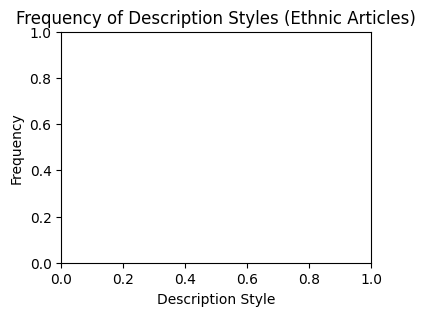

In [182]:
import matplotlib.pyplot as plt

style_counts = ethnic_df['Description Style'].value_counts()

plt.figure(figsize=(4, 3))
plt.title('Frequency of Description Styles (Ethnic Articles)')
plt.xlabel('Description Style')
plt.ylabel('Frequency')
plt.savefig(f'../data/description_style_frequency_ethnic5132_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

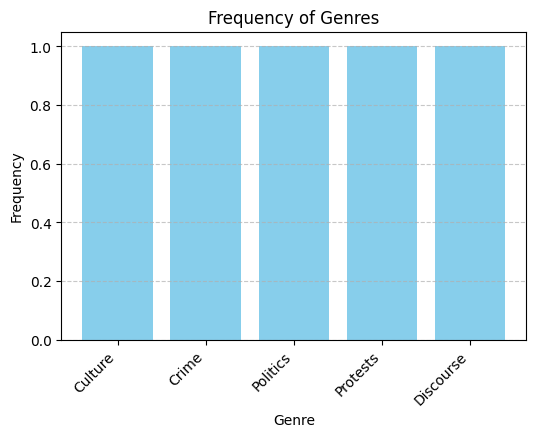

In [183]:
from collections import Counter
all_genres = [genre for sublist in ethnic_df['Genre'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the data
plt.figure(figsize=(6, 4))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/genre_frequency_ethnic5132_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

### Non Ethnic Data

In [184]:
nonethnic_articles = joblib.load("../data/nonethnic_dataset.joblib")
nonethnic_df = pd.DataFrame()
nonethnic_df["content"] = nonethnic_articles
nonethnic_df.head()

,content
0,<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দ...
1,<p>রাজধানী ঢাকার ২১টি এলাকা চিকুনগুনিয়া বিস্তা...
2,<p>আজ বৃহস্পতিবার সচিবালয়ে স্বাস্থ্য অধিদপ্তরে...
3,<p>চিকুনগুনিয়া ও ডেঙ্গু প্রতিরোধে আতঙ্ক না ছড়ি...
4,<p>সভায় স্বাস্থ্যসেবা বিভাগের সচিব সিরাজুল হক ...


In [185]:
responses = get_response_from_gemini(nonethnic_df["content"].values.tolist()[:N])

0)```json
{"genre": ["Culture", "Entertainment"], "description_style": "Straight"}
```
1)```json
{"genre": ["Health"], "description_style": "Straight"}
```


In [186]:
nonethnic_df = nonethnic_df.iloc[:N, ]
nonethnic_df["Genre"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["genre"] for response in responses]
nonethnic_df["Description Style"] = [post_process_gemini_1_5_flash_response_to_json(response.text)["description_style"] for response in responses]

nonethnic_df.head()

,content,Genre,Description Style
0,<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দ...,"[Culture, Entertainment]",Straight
1,<p>রাজধানী ঢাকার ২১টি এলাকা চিকুনগুনিয়া বিস্তা...,[Health],Straight


In [187]:
nonethnic_df.to_csv(f"../data/nonethnic_100_gemini15Flash_annotated_{EXPERIMENT_IDENTIFIER}.csv")

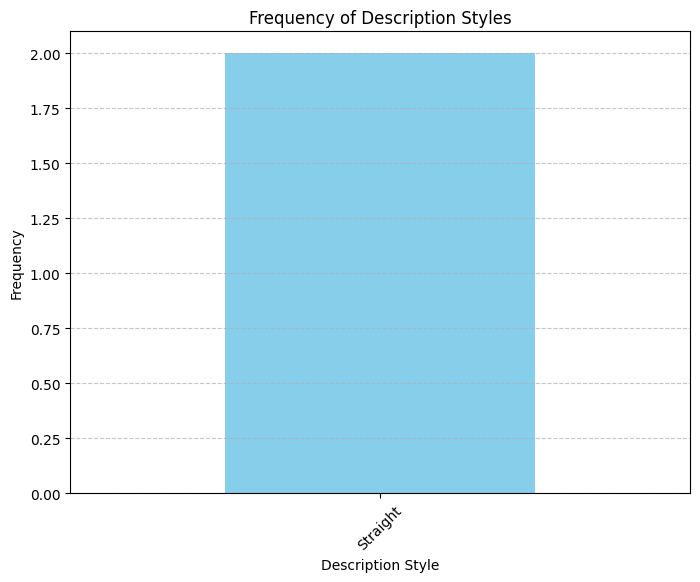

In [188]:
style_counts = nonethnic_df['Description Style'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
style_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Description Styles')
plt.xlabel('Description Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/description_style_frequency_nonethnic5133_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()

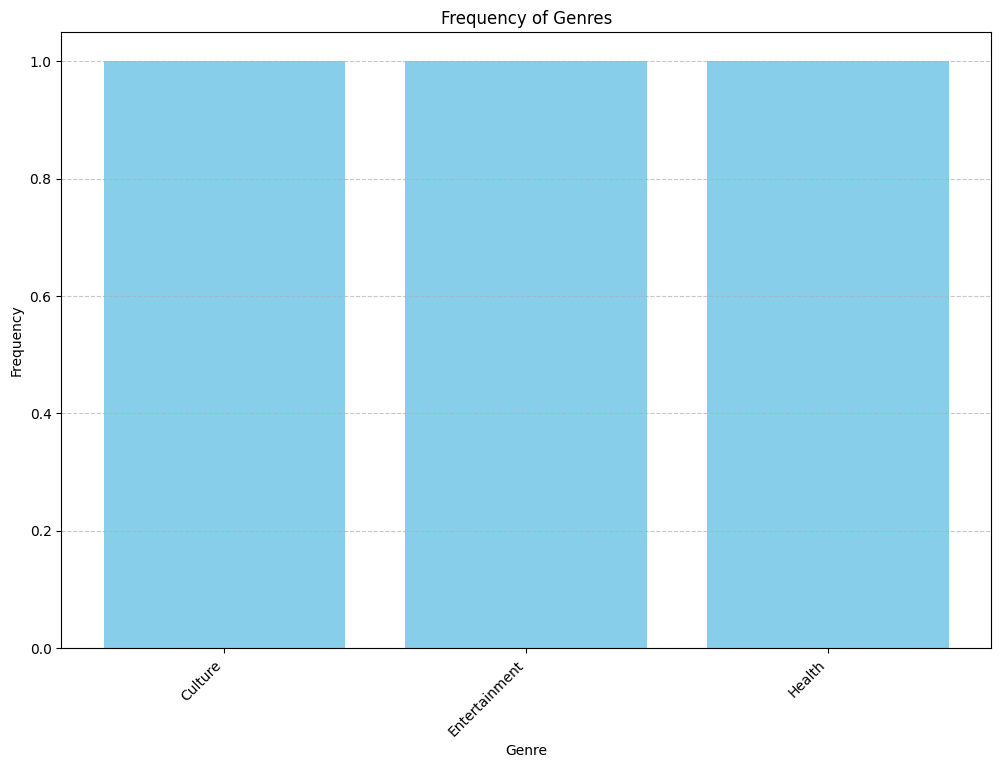

In [189]:
from collections import Counter
all_genres = [genre for sublist in nonethnic_df['Genre'] for genre in sublist]

# Count the frequency of each genre
genre_counts = Counter(all_genres)

# Plot the data
plt.figure(figsize=(12, 8))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.title('Frequency of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(f'../data/genre_frequency_nonethnic5133_100_{EXPERIMENT_IDENTIFIER}.png')
plt.show()